In [5]:
# Supress unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

In [6]:
# Importing the NumPy and Pandas packages

import numpy as np
import pandas as pd

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

#import stats library
from scipy import stats
import statsmodels.api as sm

#import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer

#import miscellaneous libraries
pd.set_option("display.max_columns",None)
pd.set_option("display.max_colwidth",200)

# Import Data

In [7]:
df_leads = pd.read_csv("Leads.csv")

In [8]:
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [9]:
# Checking dimentions

df_leads.shape

(9240, 37)

In [10]:
# Checking columns

df_leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [11]:
# Checking the summary of the data

df_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [12]:
# Checking data types for each variable/features

df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

**Observations**
- There are a quiet a few features having null values which need to be handled
- There are a few categorical features which need to be handled by creating dummy variables

# Data Cleaning and Preparation

In [13]:
# Checking null values

df_leads.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [14]:
# Checking null percentages

percentage_null = (df_leads.isnull().sum() / len(df_leads)) * 100
percentage_null = percentage_null.sort_values(ascending=False)
print(percentage_null)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

**Observation**
- From both percentage and count pov we can observe that for a few variables we have a lot of nulls which we can drop from the data set.

In [15]:
# Filter variables with null percentage > 30
columns_to_drop = percentage_null[percentage_null > 30].index

# Drop columns
df_leads = df_leads.drop(columns_to_drop, axis=1)

# Display the resulting DataFrame
print(df_leads.head())

                            Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0          

In [16]:
# Checking nulls again

percentage_null = (df_leads.isnull().sum() / len(df_leads)) * 100
percentage_null = percentage_null.sort_values(ascending=False)
print(percentage_null)

What matters most to you in choosing a course    29.318182
Lead Profile                                     29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Get updates on DM Content                         0.000000
Newspaper                                         0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.000000
Update me on Supply Chain Content                 0.000000
Receive More Updates About Our Courses            0.0000

# Checking "city" and "country" columns

In [17]:
df_leads['City'].value_counts(dropna=False)

Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

**Observation**
- Majority of the values are for mumbai.
- Also, with lead convertion as the target city of the customer does not be of big use in the model building. We can drop city.

In [18]:
# dropping "City"
df_leads.drop(['City'], axis = 1, inplace = True)

In [19]:
df_leads['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

**Observation**
- Most of the values are from India
- Also, with lead convertion as the target country of the customer does not be of big use in the model building. We can drop country.

In [20]:
# dropping "Country"
df_leads.drop(['Country'], axis = 1, inplace = True)

In [21]:
# Checking nulls again

percentage_null = (df_leads.isnull().sum() / len(df_leads)) * 100
percentage_null = percentage_null.sort_values(ascending=False)
print(percentage_null)

What matters most to you in choosing a course    29.318182
Lead Profile                                     29.318182
What is your current occupation                  29.112554
How did you hear about X Education               23.885281
Specialization                                   15.562771
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Get updates on DM Content                         0.000000
Update me on Supply Chain Content                 0.000000
X Education Forums                                0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.000000
Receive More Updates About Our Courses            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.0000

# Data Visulization

In [22]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

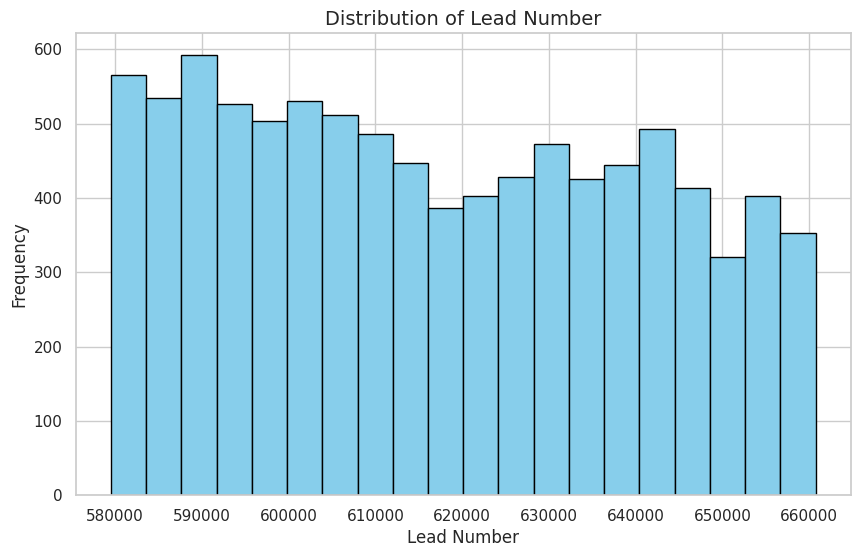

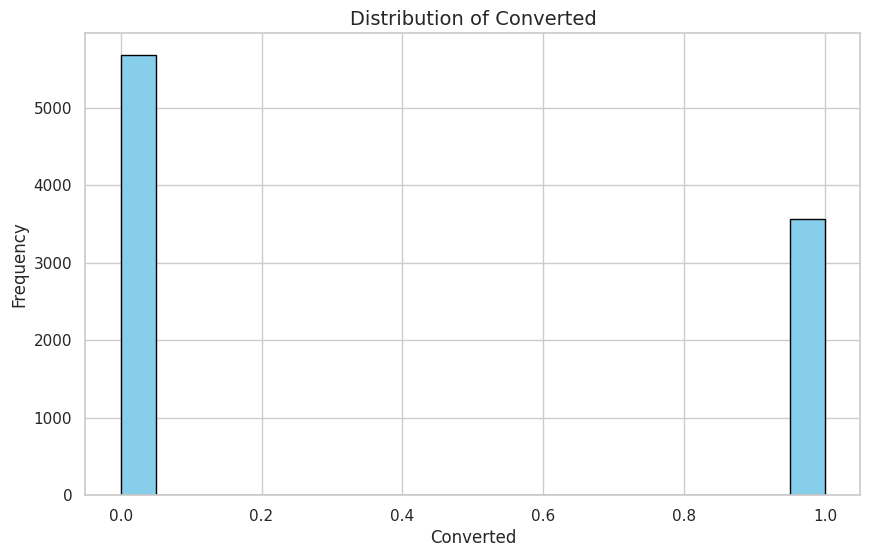

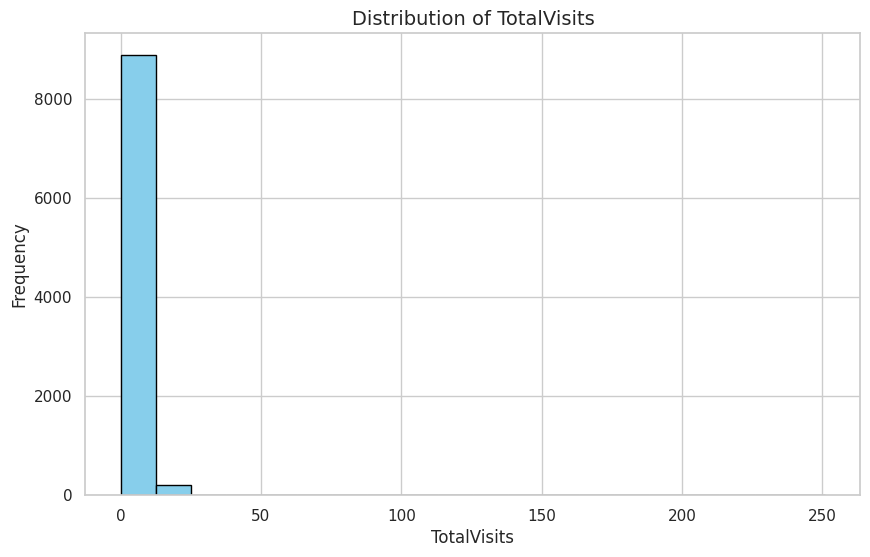

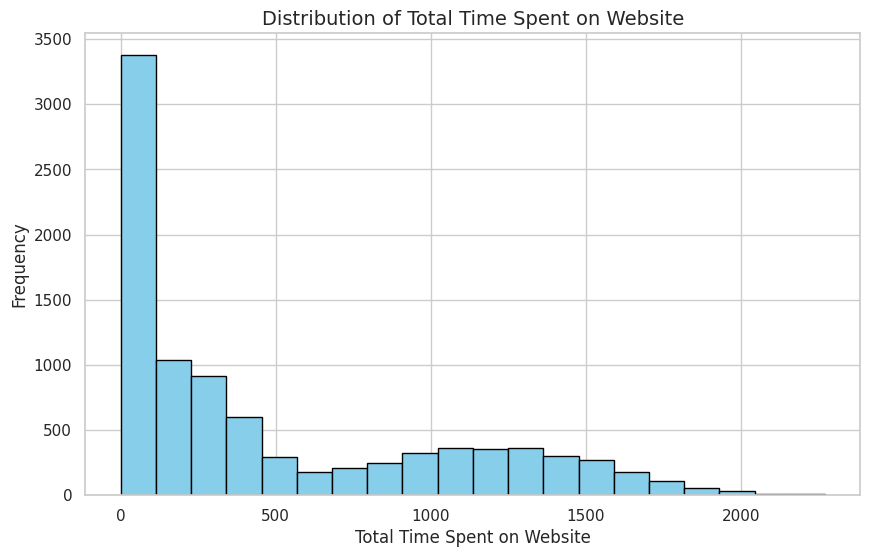

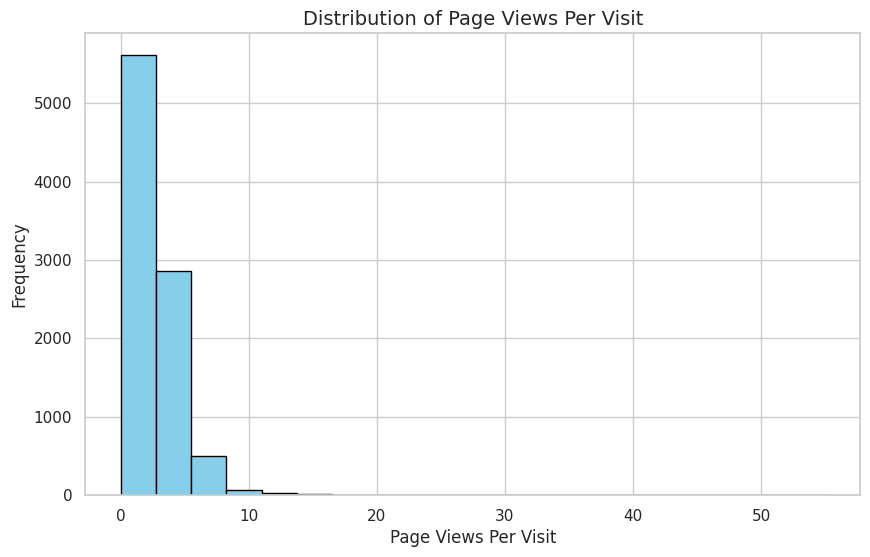

In [23]:
for c in df_leads:
    # Check if the column is numerical
    if df_leads[c].dtype in ['int64', 'float64']:
        # Plot a histogram for the numerical variable
        plt.figure(figsize=(10, 6))
        plt.hist(df_leads[c], bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Distribution of {c}', fontsize=14)
        plt.xlabel(c, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.show()

In [24]:
for c in df_leads:
    print(df_leads[c].astype('category').value_counts())
    print('___________________________________________________')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
___________________________________________________
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
___________________________________________________
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
__________________

# Let's check all the columns having "Select" as one of the values

In [25]:
columns_with_specific_value = df_leads.columns[df_leads.eq('Select').any()]

# Print the column names
print(columns_with_specific_value)

Index(['Specialization', 'How did you hear about X Education', 'Lead Profile'], dtype='object')


In [26]:
df_leads['Lead Profile'].astype('category').value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [27]:
df_leads['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [28]:
df_leads['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [29]:
df_leads['What matters most to you in choosing a course'].astype('category').value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

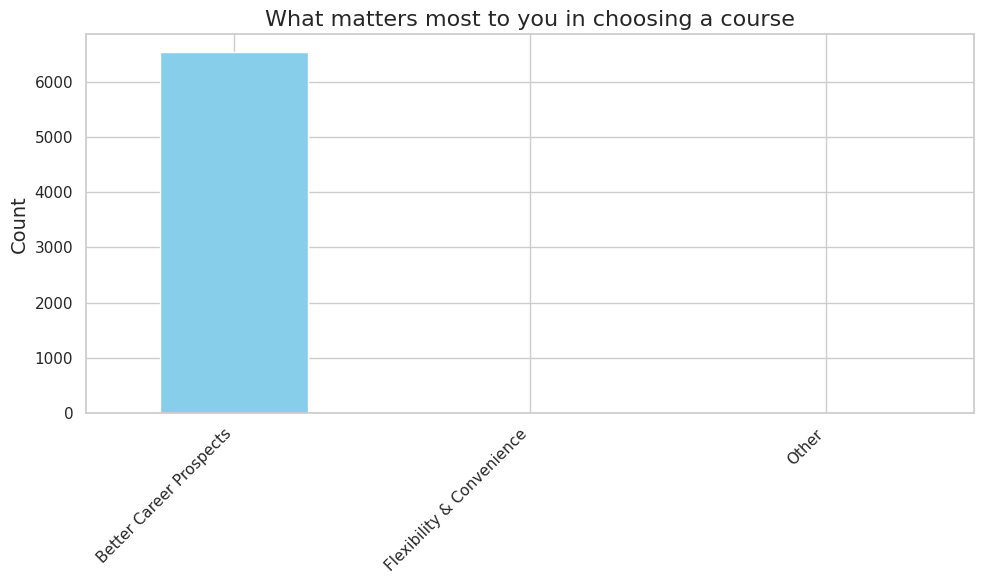

In [30]:
value_counts = df_leads['What matters most to you in choosing a course'].astype('category').value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('What matters most to you in choosing a course', fontsize=16)
#plt.xlabel('Categories', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

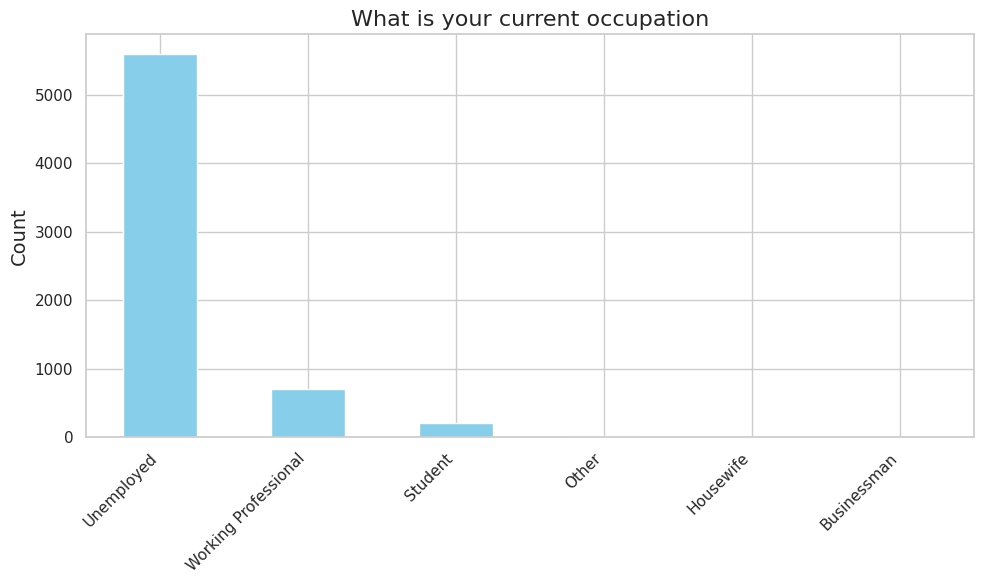

In [31]:
value_counts = df_leads['What is your current occupation'].astype('category').value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('What is your current occupation', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

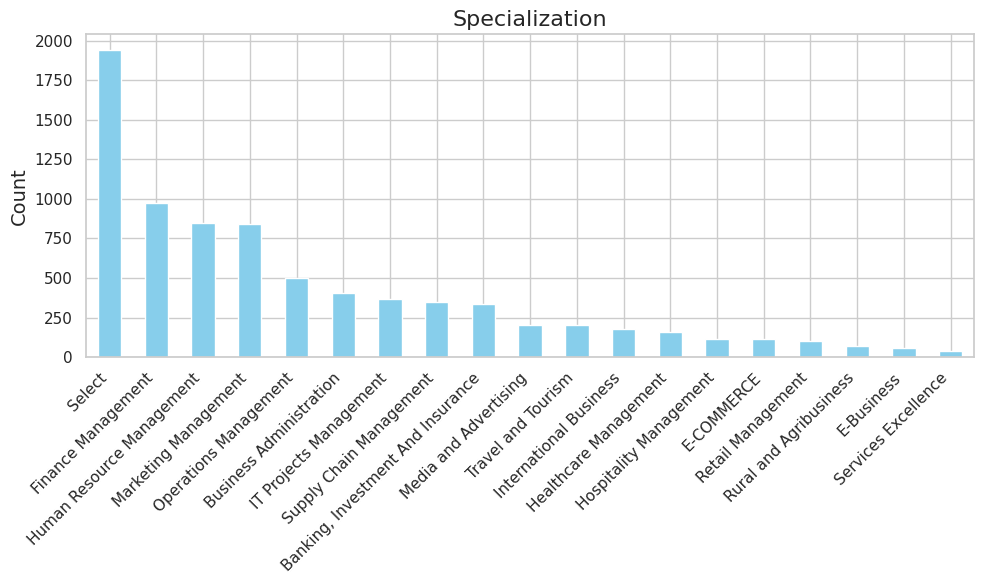

In [32]:
value_counts = df_leads['Specialization'].astype('category').value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Specialization', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Observation**
- "Lead Profile" and "How did you hear about X Education" have majority of the rows with "Select" as the value
- We can drop these two columns

In [33]:
df_leads.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

**Observation**

Additionally, upon examining the value counts of all columns, it was observed that several columns predominantly contained only one value across all data points. These columns include 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', and 'I agree to pay the amount through cheque'. Given that the vast majority of values for these variables are 'No', it is advisable to drop these columns as they do not contribute significantly to our analysis.

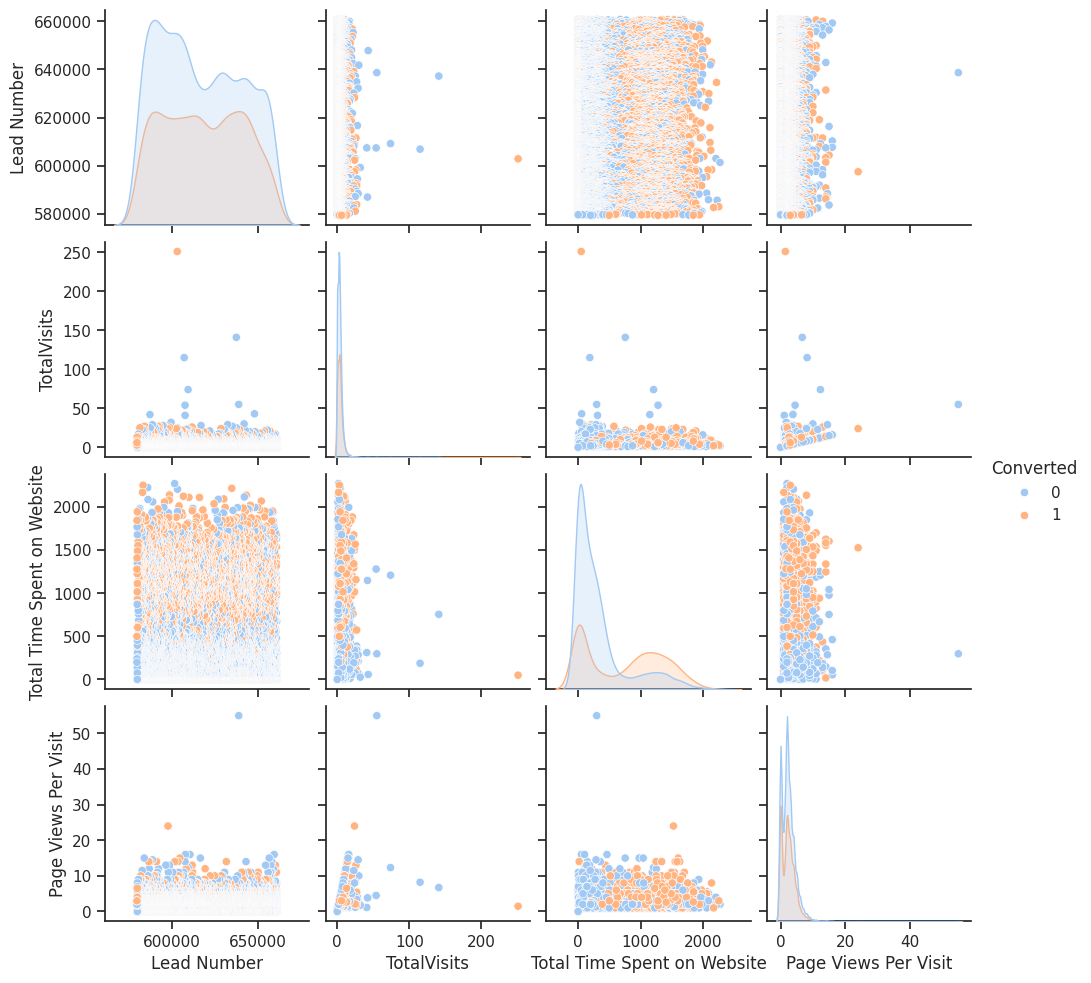

In [34]:
# Set Seaborn style
sns.set(style="ticks", palette="pastel")

# Create pairplot with KDE diagonal plots and hue for Converted
sns.pairplot(df_leads, diag_kind='kde', hue='Converted')

# Show the plot
plt.show()

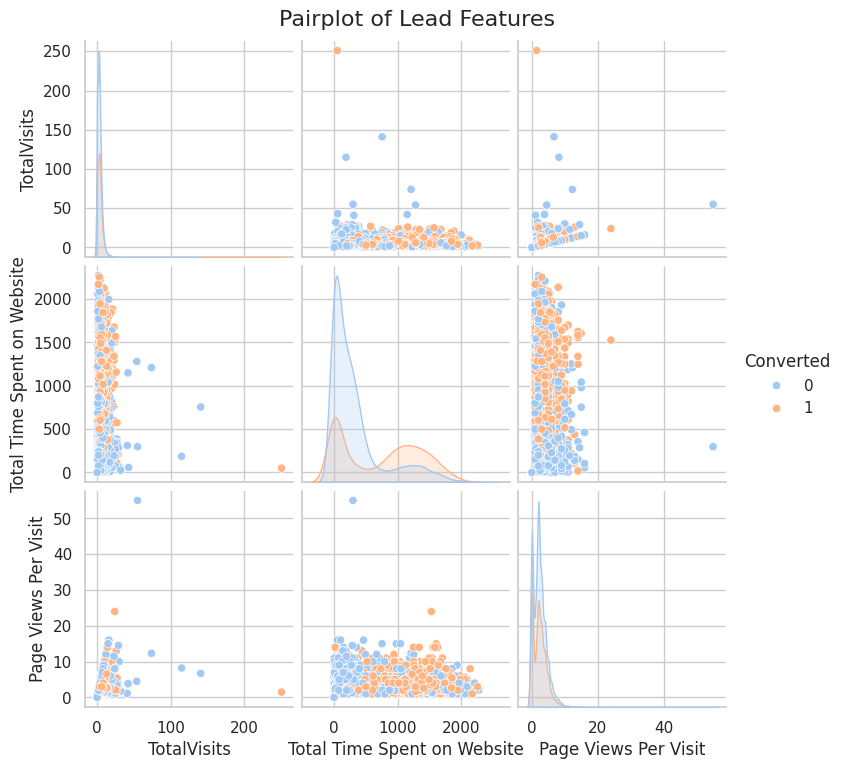

In [35]:
x_ed = df_leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]

# Set Seaborn style and palette
sns.set(style="whitegrid", palette="pastel")

# Create pairplot with KDE diagonal plots and hue for Converted
sns.pairplot(x_ed, diag_kind='kde', hue='Converted')

# Adjust plot title
plt.suptitle('Pairplot of Lead Features', y=1.02, size=16)

# Show the plot
plt.show()

In [36]:
transformedx_ed = pd.DataFrame(PowerTransformer().fit_transform(x_ed), columns=x_ed.columns)
transformedx_ed.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted
0,-1.457907,-1.473767,-1.454706,-0.791863
1,0.747918,0.729628,0.308534,-0.791863
2,-0.141636,1.306093,0.065574,1.262845
3,-0.640428,0.264936,-0.536967,-0.791863
4,-0.141636,1.252499,-0.536967,1.262845


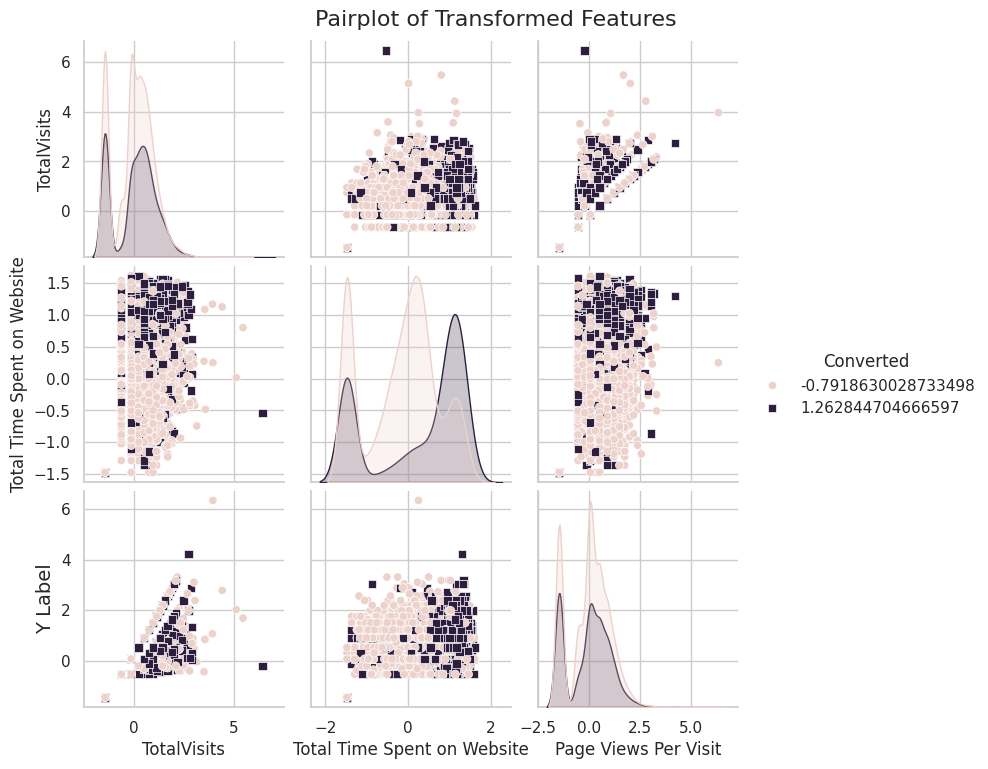

In [37]:
# Set the style of the plot
sns.set_style("whitegrid")

# Define the markers for different categories
markers = ['o', 's']

# Create the pairplot with KDE diagonal plots
pair_plot = sns.pairplot(transformedx_ed, diag_kind='kde', hue='Converted', markers=markers)

# Set the title and labels
title = pair_plot.fig.suptitle('Pairplot of Transformed Features', fontsize=16)
xlabel = pair_plot.axes[0, 0].set_xlabel('X Label', fontsize=14)
ylabel = pair_plot.axes[-1, 0].set_ylabel('Y Label', fontsize=14)

# Adjust the position of the title and labels
title.set_position([.5, 1.02])
xlabel.set_position([.5, -0.02])
ylabel.set_position([-0.02, 0.5])

# Show the plot
plt.show()

In [38]:
# Dropping the columns identified above

df_leads.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
            'Update me on Supply Chain Content', 'Get updates on DM Content',
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [39]:
df_leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [40]:
df_leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

**Observation**
- For 'What matters most to you in choosing a course' we can see that most of the leads are looking for a better career prospects, this feature will not be of big use for modeling and can be dropped.

In [41]:
df_leads.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [42]:
# Checking null counts one more time
df_leads.isnull().sum().sort_values(ascending=False)

What is your current occupation           2690
Specialization                            1438
TotalVisits                                137
Page Views Per Visit                       137
Last Activity                              103
Lead Source                                 36
Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

**Observation**
- Column 'What is your current occupation' has many nulls however this column is important to predict the potential conversion probability of a lead instead of dropping this feature we will remove rows with nulls.

In [43]:
df_leads = df_leads[~pd.isnull(df_leads['What is your current occupation'])]

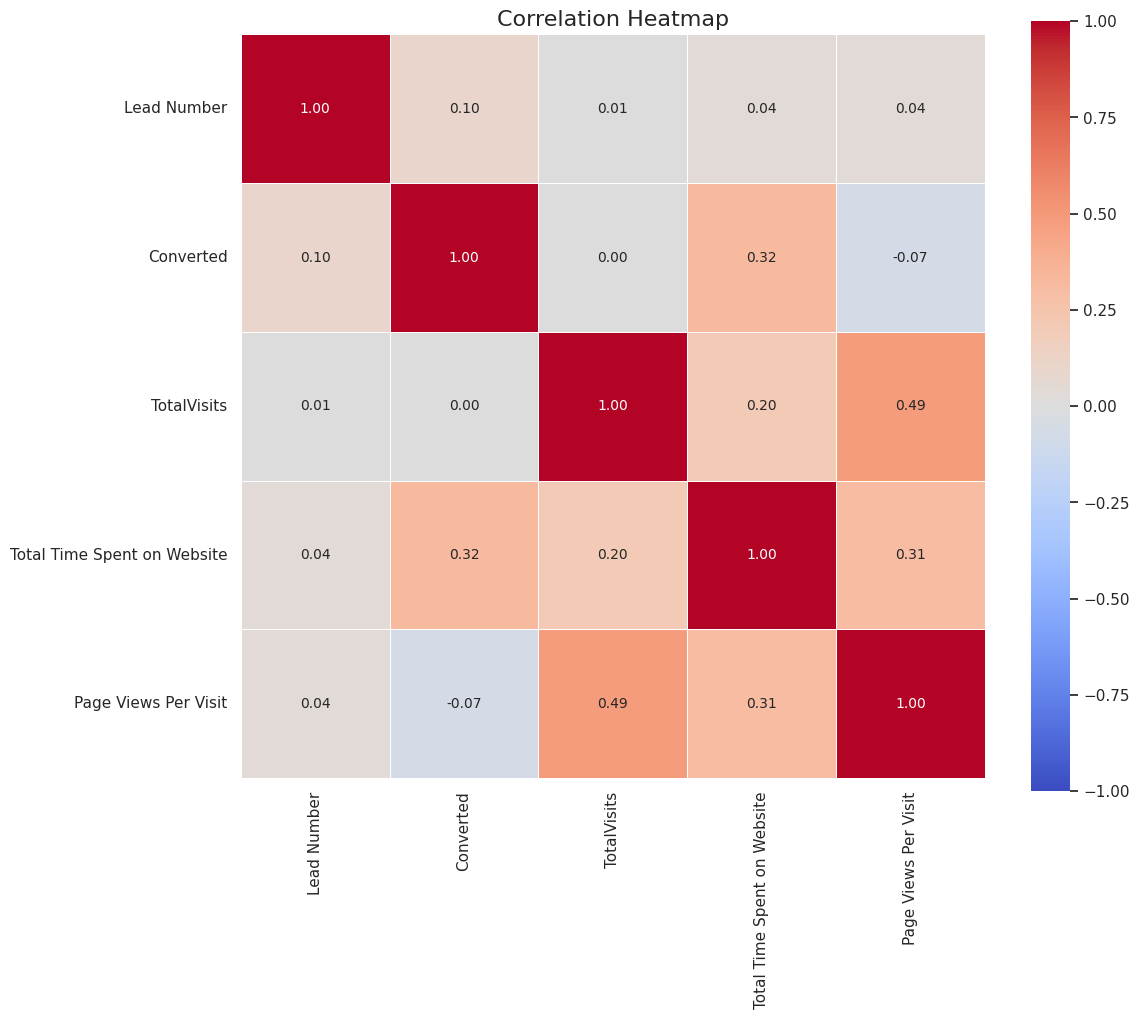

In [44]:
# Let's check the correlation

# Set the figure size
plt.figure(figsize=(12, 10))

# Create the correlation heatmap
heatmap = sns.heatmap(df_leads.corr(),
                      annot=True,            # Show correlation values
                      cmap="coolwarm",      # Color map
                      fmt=".2f",            # Format of annotation
                      linewidths=0.5,       # Width of lines that divide each cell
                      annot_kws={"size": 10},  # Font size of annotations
                      vmin=-1, vmax=1       # Range of correlation values
                      )

# Set the title
plt.title('Correlation Heatmap', fontsize=16)

# Adjust the aspect ratio of the plot
heatmap.set_aspect("equal")

# Show the plot
plt.show()

# Categorical Feature Analysis

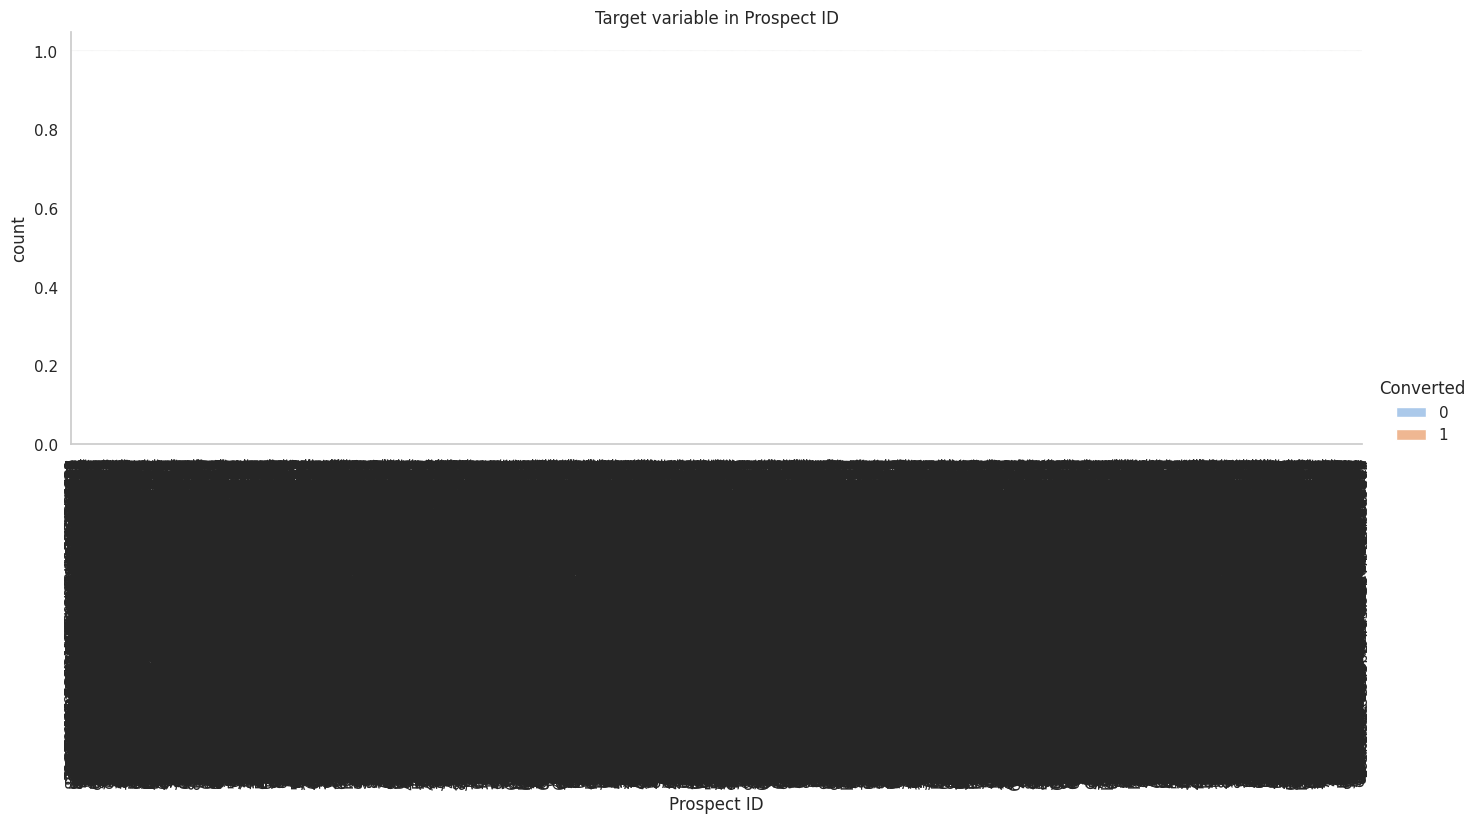

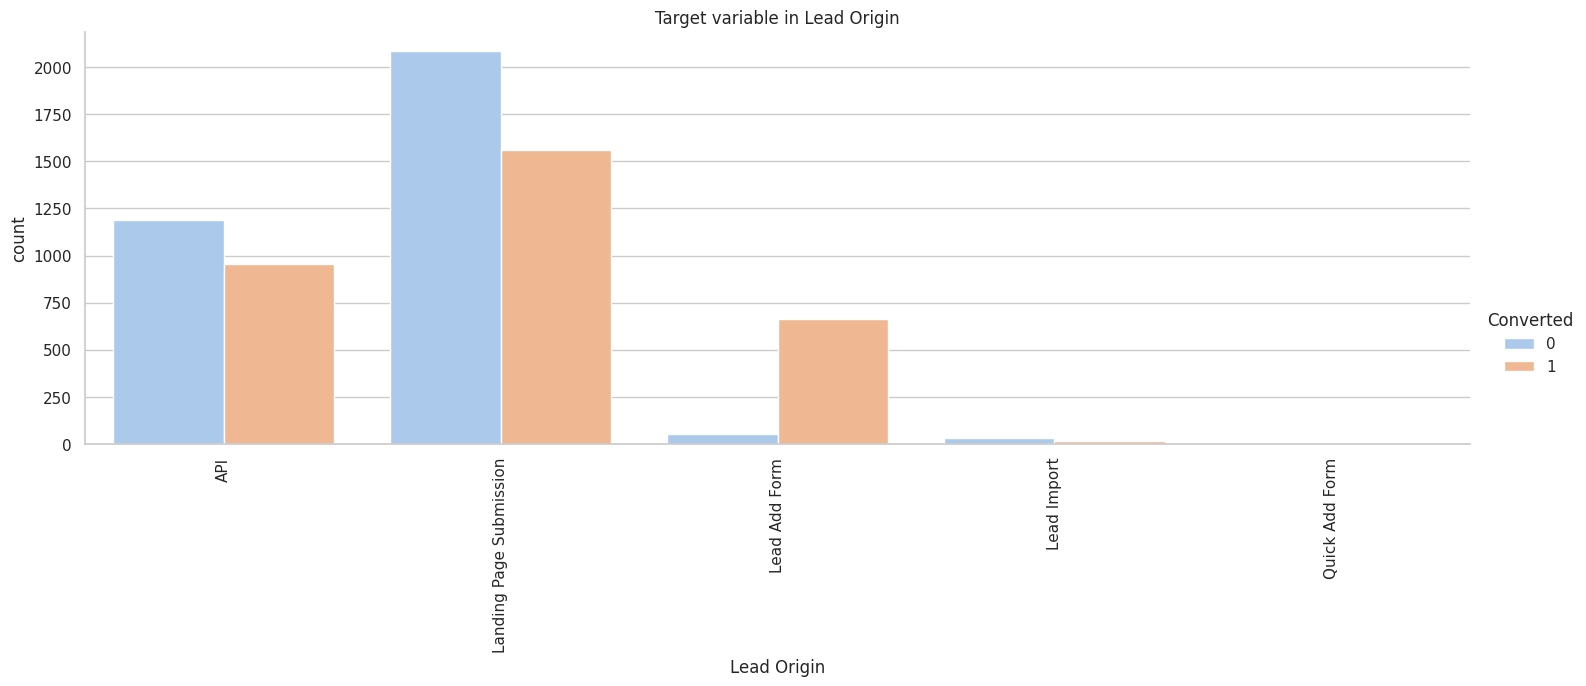

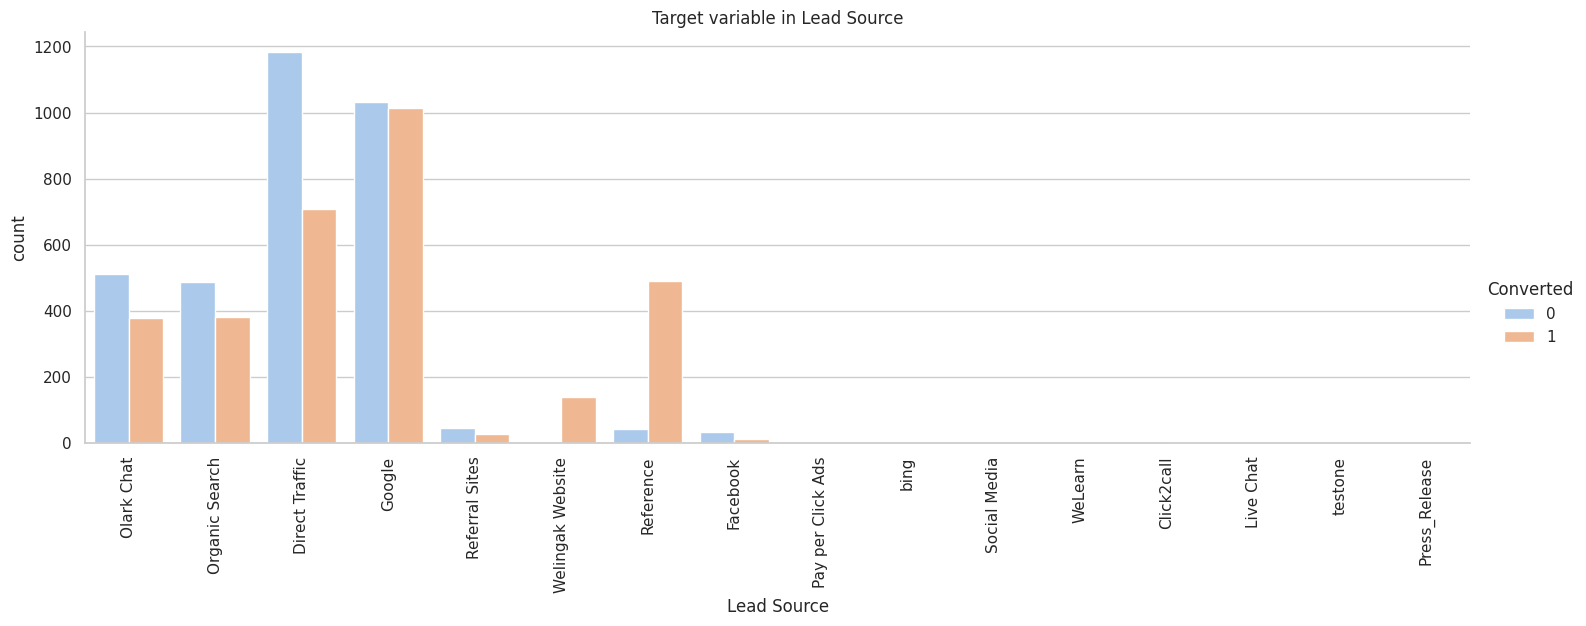

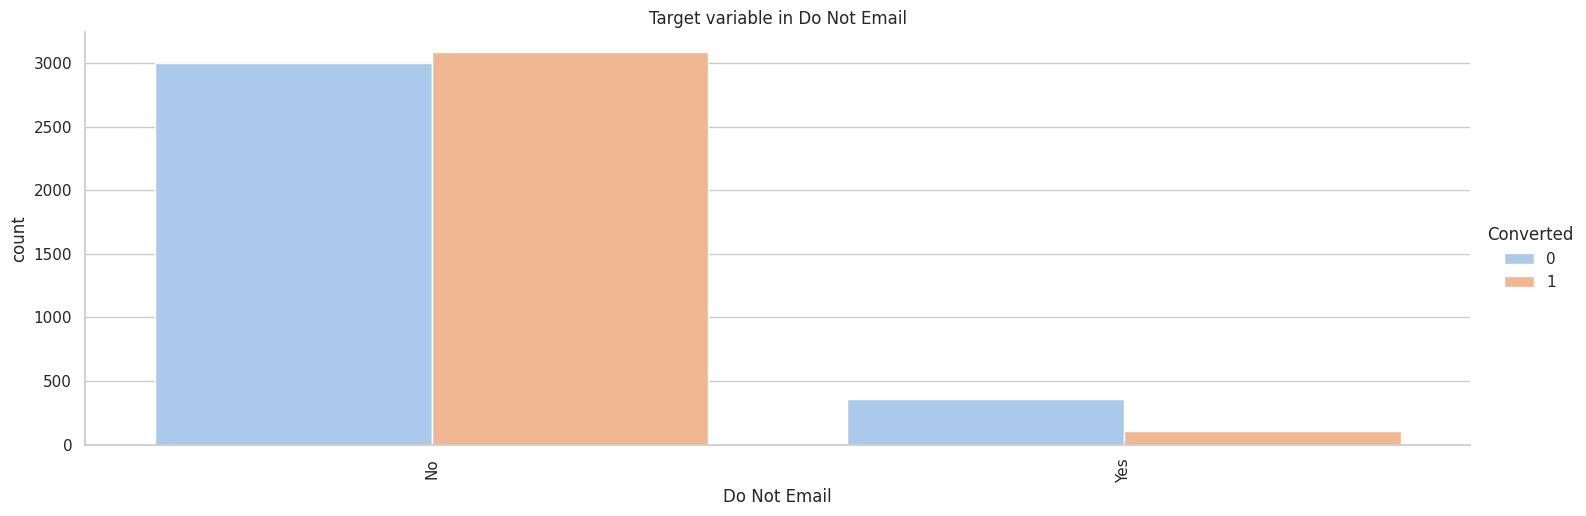

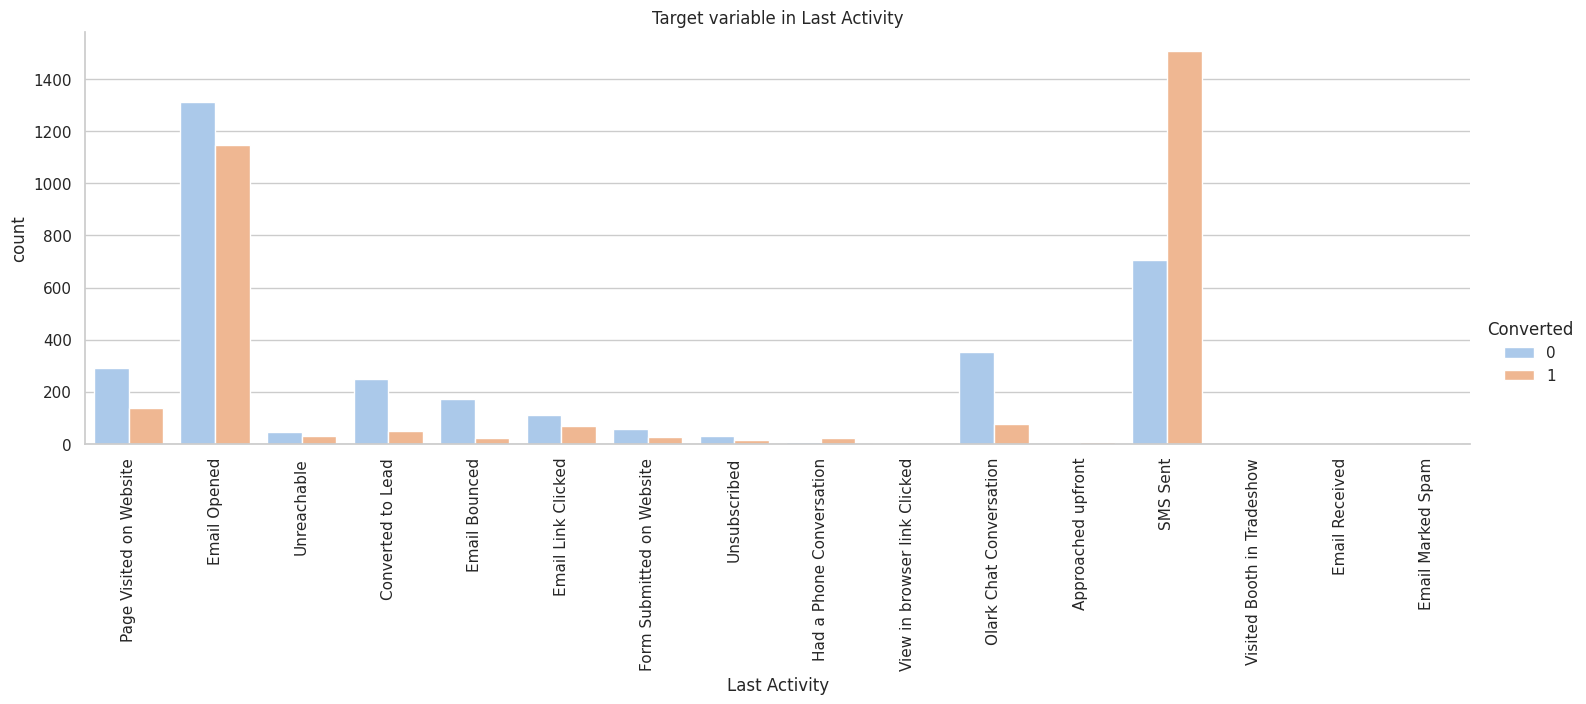

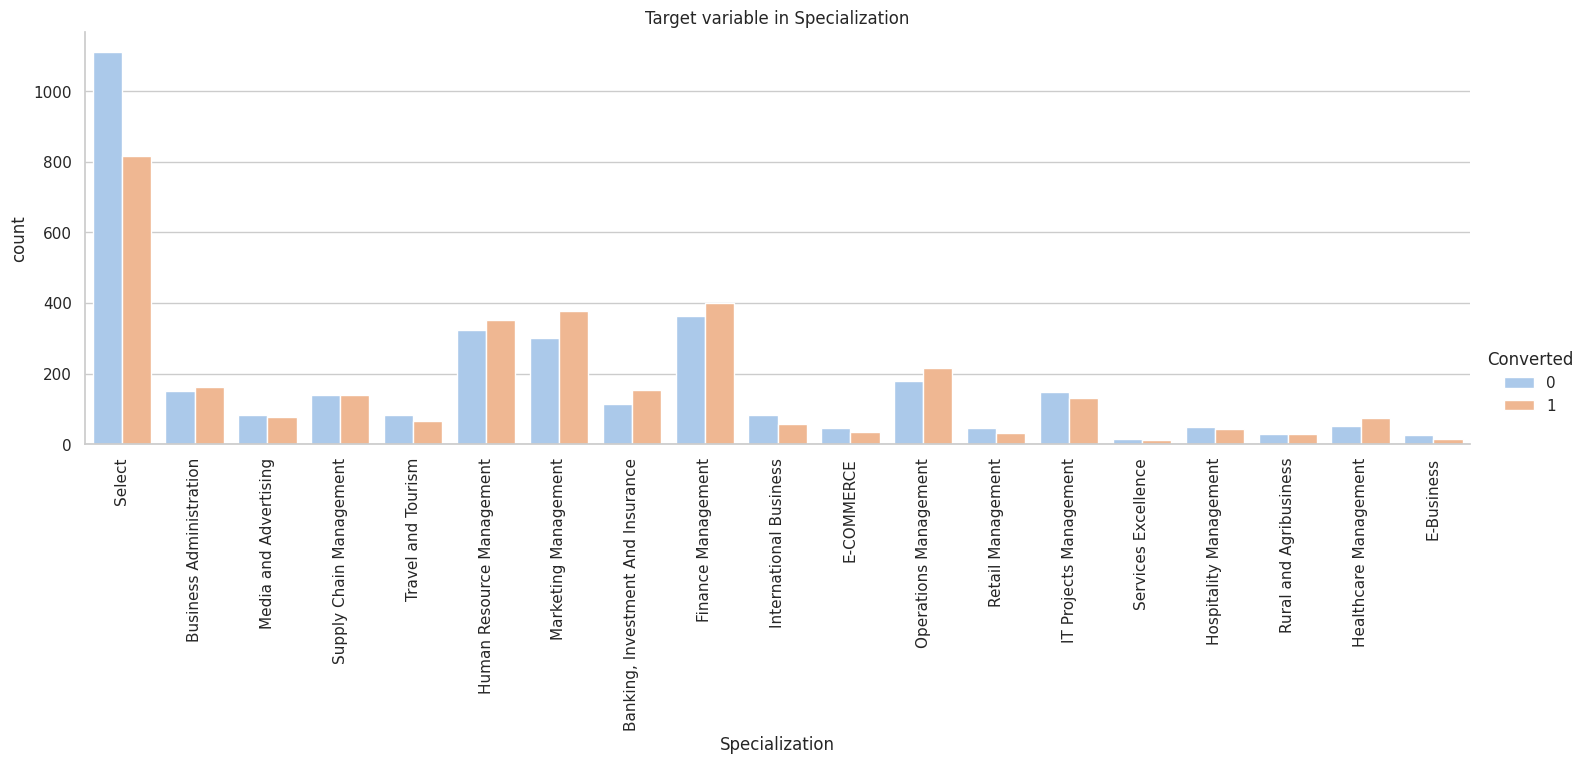

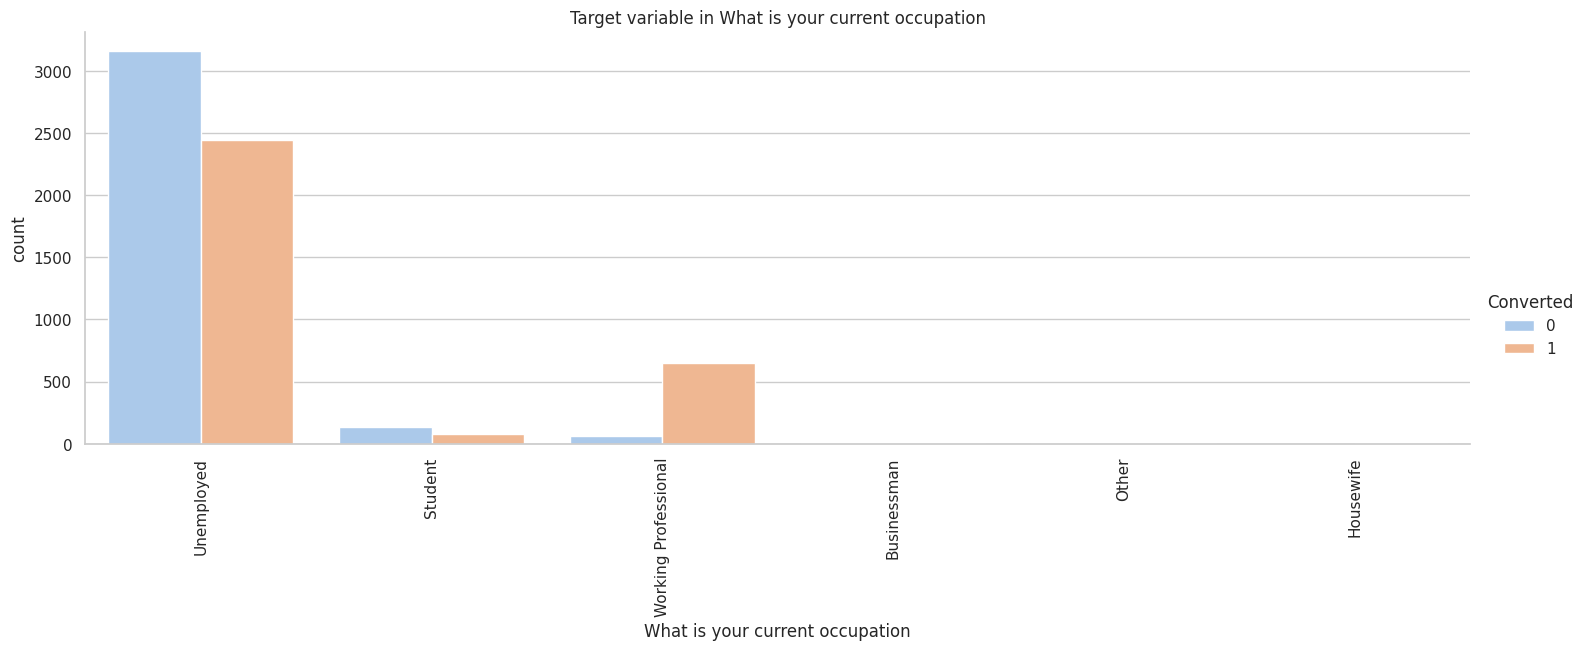

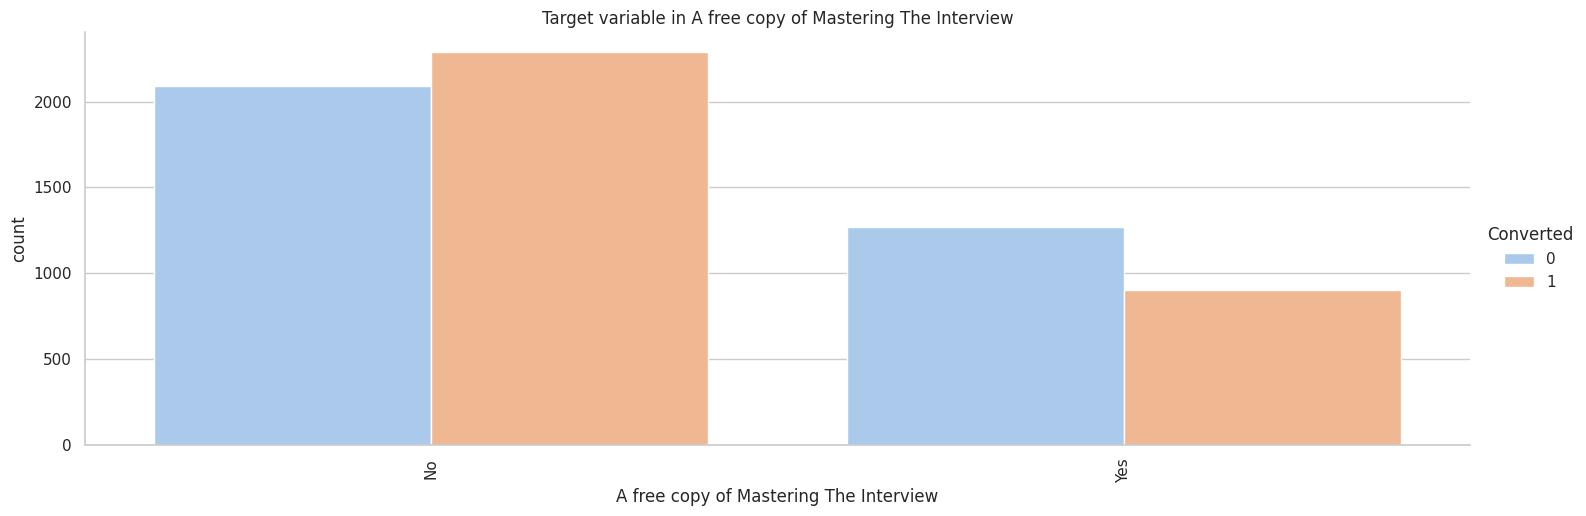

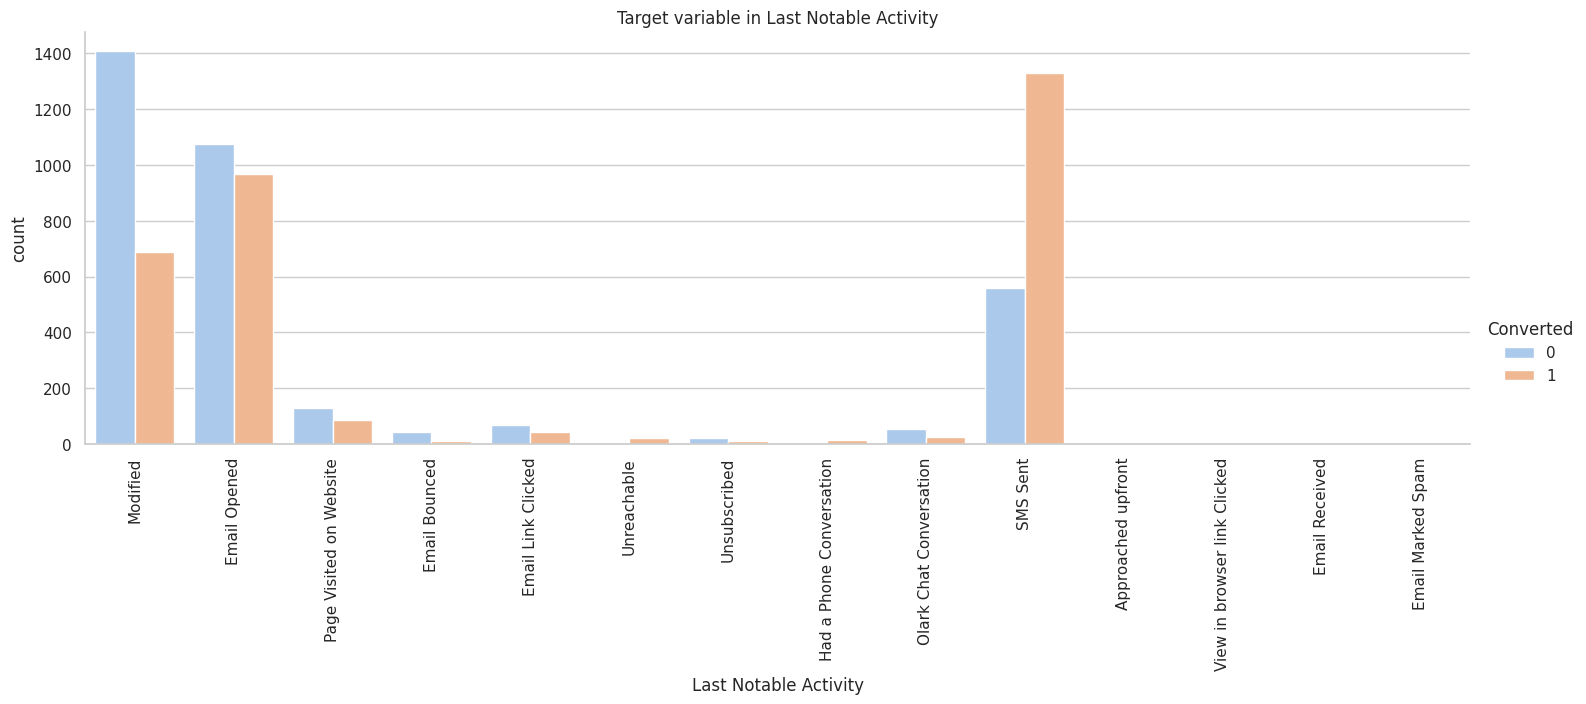

In [45]:
# Get the columns with object data type
cats = df_leads.select_dtypes(include="object").columns

# Loop through each categorical column
for i in cats:
    # Create a catplot with countplot type
    sns.catplot(x=i, hue='Converted', data=df_leads, kind='count', height=5, aspect=3)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)

    # Set the title and labels
    plt.title('Target variable in ' + i)
    plt.xlabel(i)

    # Show the plot
    plt.show()

In [46]:
# Checking null values again
df_leads.isnull().sum().sort_values(ascending=False)

TotalVisits                               130
Page Views Per Visit                      130
Last Activity                             103
Lead Source                                36
Specialization                             18
Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Do Not Email                                0
Converted                                   0
Total Time Spent on Website                 0
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [47]:
df_leads =df_leads[~pd.isnull(df_leads['TotalVisits'])]

In [48]:
df_leads.isnull().sum().sort_values(ascending=False)

Lead Source                               29
Specialization                            18
Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [49]:
df_leads = df_leads[~pd.isnull(df_leads['Lead Source'])]

In [50]:
df_leads = df_leads[~pd.isnull(df_leads['Specialization'])]

In [51]:
df_leads.isnull().sum().sort_values(ascending=False)

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

- All null value rows are now removed.
- Next step - checking the rows retained percentage

In [52]:
print(len(df_leads.index))
print(len(df_leads.index)/9240) # Original data set had total of 9240 rows of data

6373
0.6897186147186147


**Observation**
- After dropping null rows we still have close to 69% of the data retained which is good for training and testing the model

In [53]:
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


**Observation**
- Prospect ID and Lead Number are not going to be useful for model building hence can be dropped

In [54]:
df_leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [55]:
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


# Dummy Variable Creation for Categorical Features

In [56]:
tmp = df_leads.loc[:, df_leads.dtypes == 'object']
tmp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [57]:
df = pd.DataFrame({'P': ['p', 'q', 'p']})
df

,P
0,p
1,q
2,p


In [58]:
pd.get_dummies(df)

,P_p,P_q
0,1,0
1,0,1
2,1,0


In [59]:
pd.get_dummies(df, prefix=['col1'])

,col1_p,col1_q
0,1,0
1,0,1
2,1,0


In [60]:
# Dummy variables creation using the 'get_dummies'
dummy = pd.get_dummies(df_leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview',
                              'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
df_leads = pd.concat([df_leads, dummy], axis=1)

In [61]:
# Creating dummy value for "Specialization" as it has specific value "Select" which can be of no use for model hence can be dropped

dummy_1 = pd.get_dummies(df_leads['Specialization'], prefix = 'Specialization')
dummy_1 = dummy_1.drop(['Specialization_Select'], 1)
df_leads = pd.concat([df_leads, dummy_1], axis = 1)

In [62]:
# Cleaning (by dropping) the variables for which the dummy variables have been created

df_leads = df_leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [63]:
df_leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Test Train Split

In [64]:
X = df_leads.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [65]:
y = df_leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [66]:
# Distributing the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [67]:
# Checking the shape for train and test data sets
print("X_train Size", X_train.shape)
print("y_train Size", y_train.shape)

X_train Size (4461, 74)
y_train Size (4461,)


# Scaling

In [68]:
scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.015936,0.029489,0.125,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
218,0.015936,0.082306,0.250,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4171,0.023904,0.034331,0.375,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4037,0.000000,0.000000,0.000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3660,0.000000,0.000000,0.000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


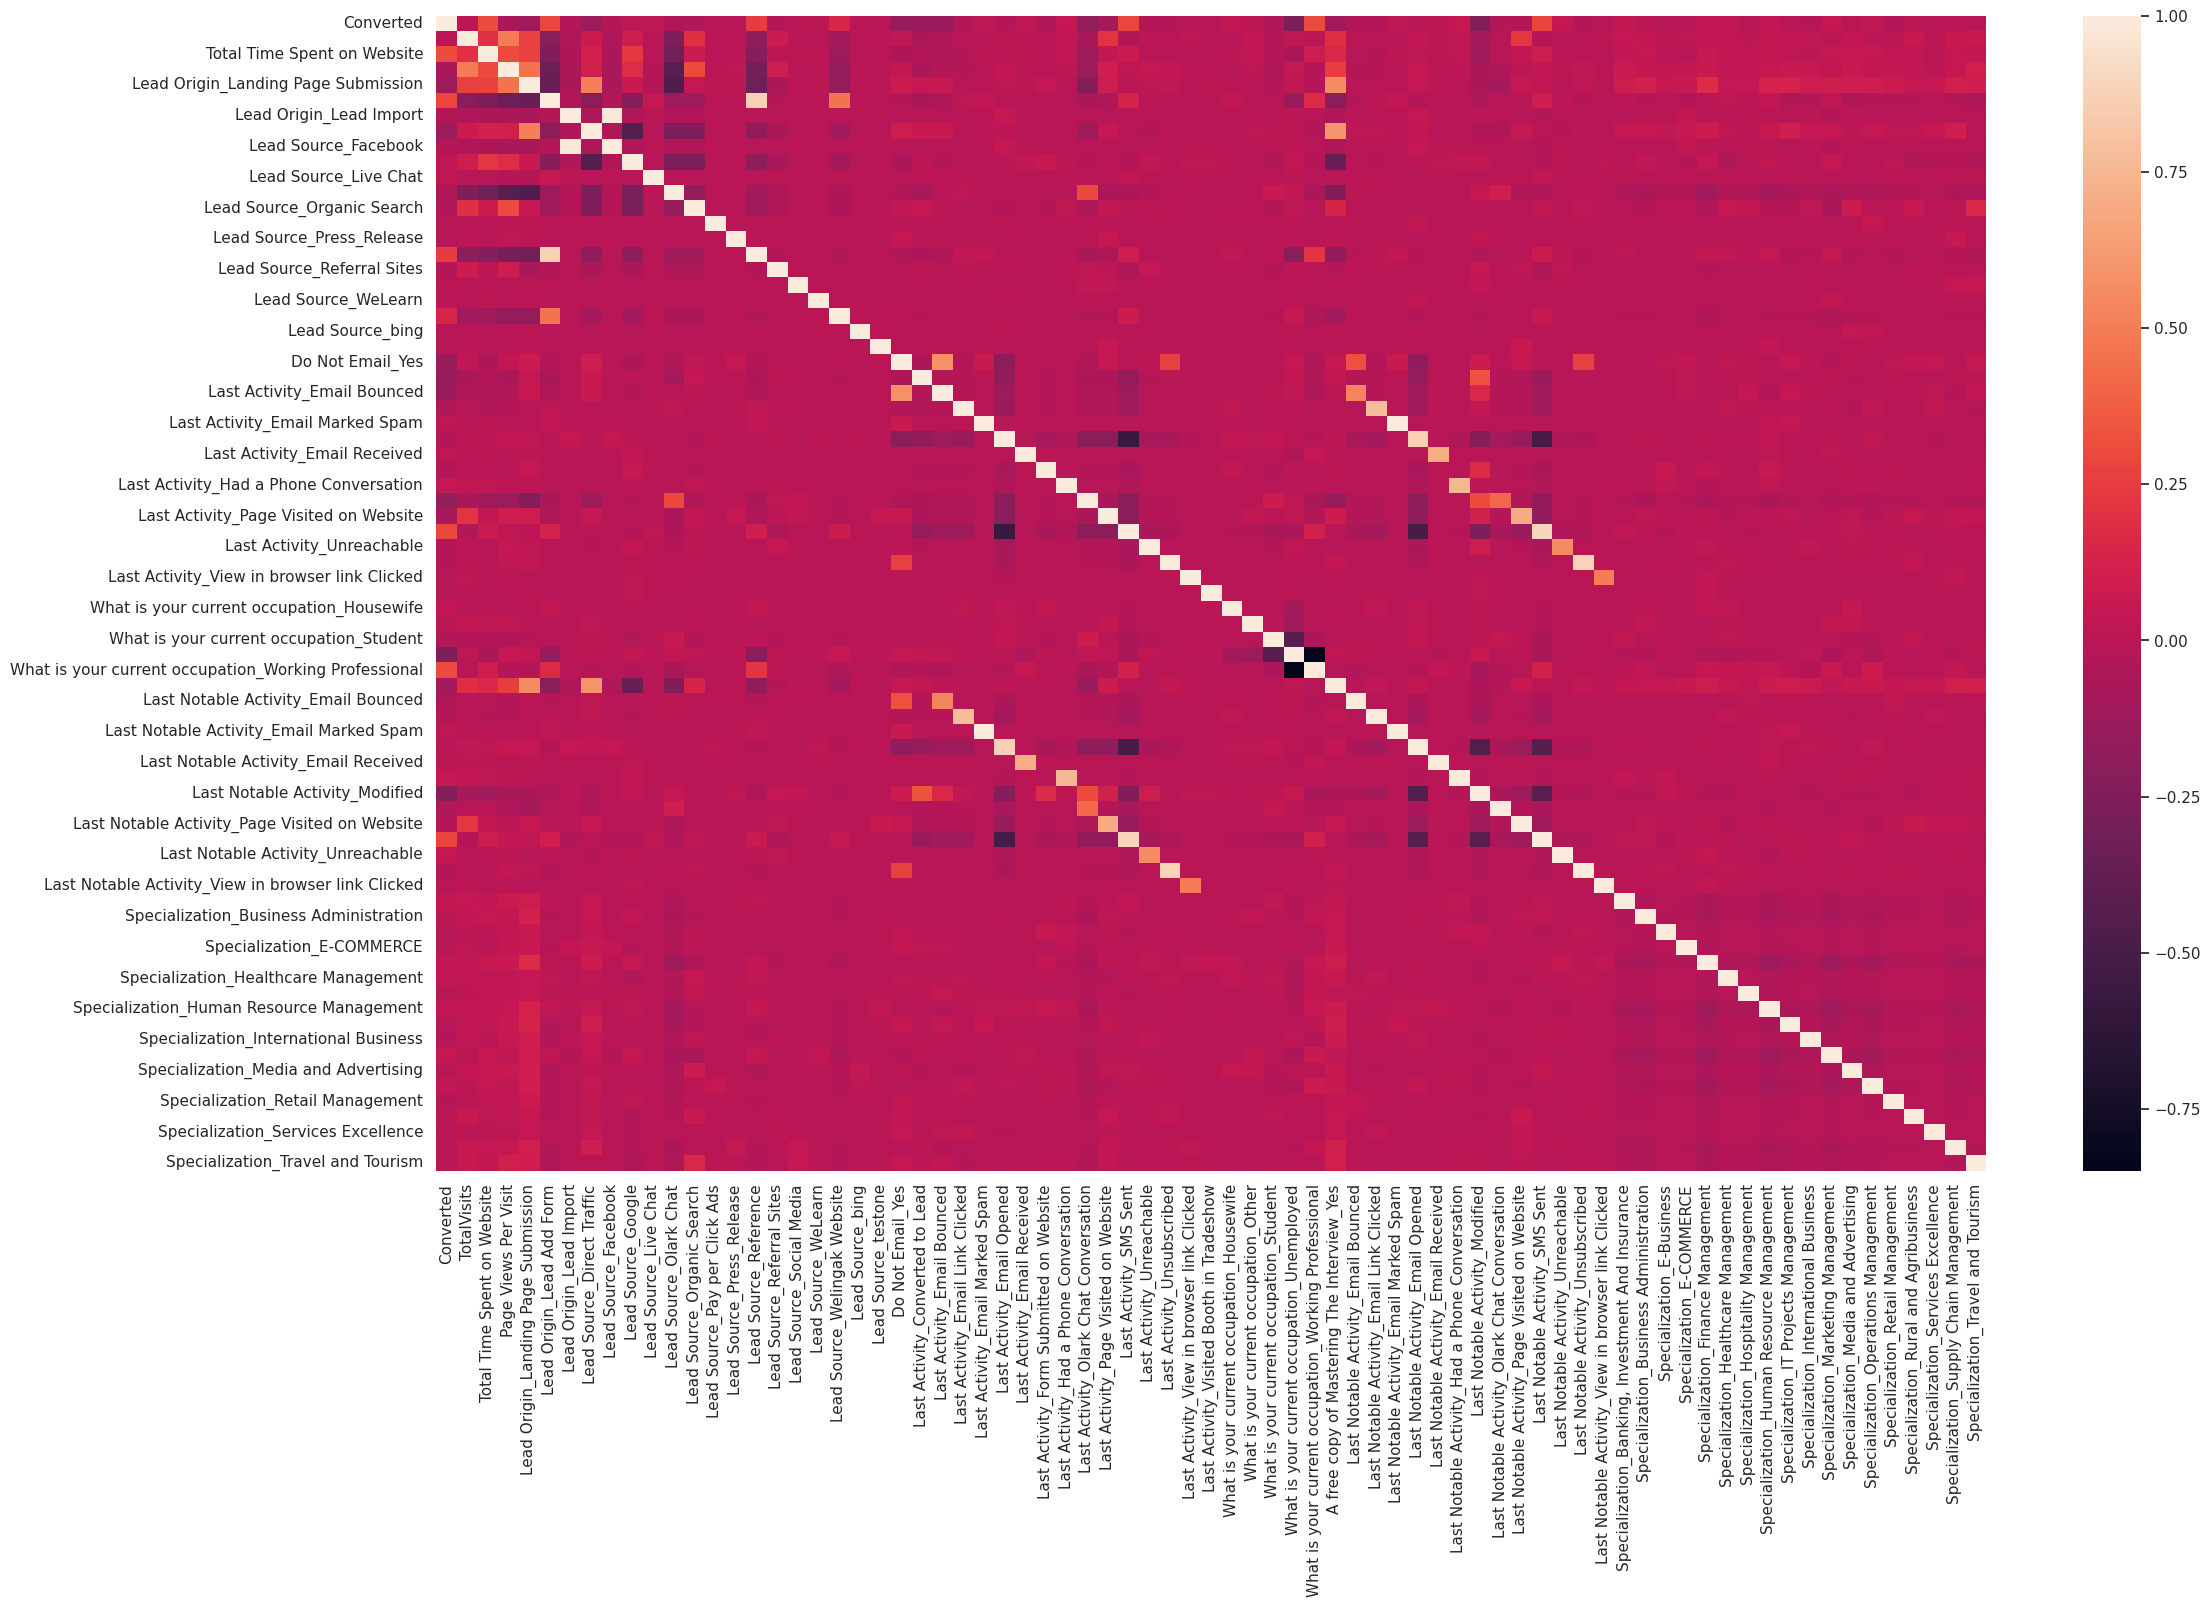

In [69]:
# Plotting correlation table
plt.figure(figsize = (25,15))
sns.heatmap(df_leads.corr())
plt.show()

In [70]:
df_leads.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
Converted,1.000000,0.005651,0.313338,-0.063362,-0.117563,0.288666,-0.019269,-0.133600,-0.021207,0.020205,0.018407,-0.044348,-0.034223,-0.012059,-0.012059,0.243200,-0.023501,0.000676,0.013015,0.144864,-0.006411,-0.012059,-0.148451,-0.138834,-0.134838,-0.033557,0.018407,-0.022391,0.018407,-0.036322,0.041575,-0.164168,-0.087121,0.285854,-0.021383,-0.032757,-0.011583,-0.012059,0.039068,0.011575,-0.034491,-0.259722,0.304859,-0.094833,-0.052371,-0.026291,0.018407,-0.010199,0.013015,0.046969,-0.239572,-0.039205,-0.032219,0.284301,0.050436,-0.026673,-0.012059,0.036229,0.014468,-0.017955,-0.015443,0.027078,0.028249,-0.006080,0.025865,-0.005689,-0.024789,0.049520,-0.000862,0.031349,-0.018603,0.006964,-0.005142,0.005785,-0.011762
TotalVisits,0.005651,1.000000,0.202551,0.489039,0.267954,-0.208375,-0.043000,0.075252,-0.042052,0.085306,-0.012720,-0.247963,0.192469,-0.001549,0.005896,-0.180458,0.078163,-0.003946,-0.004031,-0.097011,-0.004116,0.003414,0.028900,-0.074517,-0.040748,-0.013791,0.001319,0.011982,0.006584,0.007614,0.020031,-0.076145,0.210159,-0.039886,0.013528,0.001193,0.022964,0.000933,-0.008788,0.032481,-0.030920,0.024928,-0.016292,0.186583,-0.009105,0.002706,0.001319,0.026851,0.005896,0.026100,-0.088690,-0.004994,0.226728,-0.028923,0.002792,0.001631,0.010859,0.042269,0.035184,0.015248,0.019003,0.031922,0.027640,0.016549,0.032934,0.025182,0.028630,-0.000493,0.038725,0.008929,0.014223,0.068015,0.015114,0.063383,0.064384
Total Time Spent on Website,0.313338,0.202551,1.000000,0.303870,0.275606,-0.249493,-0.061429,0.114088,-0.060

In [71]:
# Checking the shape for train and test data sets
print("X_train Size", X_train.shape)
print("y_train Size", y_train.shape)

X_train Size (4461, 74)
y_train Size (4461,)


# Model Building

- Due to the presence of huge no.of features it is a good practice to use limited no.of features for model building using RFE

In [72]:
# Creating a LogisticRegression object
logreg = LogisticRegression()

In [73]:
# Running RFE with 15 variables as output

rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [74]:
# Checking which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 23),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 52),
 ('Lead Source_Direct Traffic', False, 24),
 ('Lead Source_Facebook', False, 51),
 ('Lead Source_Google', False, 36),
 ('Lead Source_Live Chat', False, 44),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Pay per Click Ads', False, 43),
 ('Lead Source_Press_Release', False, 53),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 37),
 ('Lead Source_Social Media', False, 58),
 ('Lead Source_WeLearn', False, 42),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 33),
 ('Lead Source_testone', False, 38),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 25),
 ('Last Activity_Email Bounced', False, 4),
 ('Last Activity_Email Link C

In [75]:
# Creating a variable with all the features selected by RFE
col = X_train.columns[rfe.support_]

In [76]:
X_train = X_train[col]

# # Model 1

In [78]:
# Fitting logistic Regression model on X_train after adding a constant and output the summary

X_train = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.8
Date:                Mon, 18 Mar 2024   Deviance:                       4145.5
Time:                        16:11:03   Pearson chi2:                 4.84e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3660
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0061      0.600     -1.677      0.094      -2.182       0.170
TotalVisits                                             11.3439      2.682      4.230      0.000       6.088      16.600
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                2.9483      1.191      2.475      0.013       0.614       5.283
Lead Source_Olark Chat                                   1.4584      0.122     11.962      0.000       1.219       1.697
Lead Source_Reference                                    1.2994      1.214      1.070      0.285      -1.080       3.679
Lead Source_Welingak Website                             3.4159      1.558      2.192      0.028       0.362       6.470
Do Not Email_Yes                                        -1.5053      0.193     -7.781      0.000      -1.884      -1.126
Last Activity_Had a Phone Conversation                   1.0397      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6492   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1544      0.630     -1.831      0.067      -2.390       0.081
What is your current occupation_Unemployed              -1.3395      0.594     -2.254      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1932   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7868      0.807      3.453      0.001       1.205       4.369
========================================================================================================================
"""

**Observation**
- Multiple variables exhibit p-values greater than 0.05, suggesting the need for attention. Before addressing these variables, let's evaluate the VIFs.

In [79]:
# Checking VIF values

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,268.29
3,Lead Origin_Lead Add Form,76.26
5,Lead Source_Reference,60.51
12,What is your current occupation_Unemployed,31.55
13,What is your current occupation_Working Professional,25.46
6,Lead Source_Welingak Website,19.60
11,What is your current occupation_Student,8.39
8,Last Activity_Had a Phone Conversation,2.43
14,Last Notable Activity_Had a Phone Conversation,2.43
10,What is your current occupation_Housewife,1.47


**Observation**
- "Lead Source_Reference" has high p-value and high VIF value, this feature can be dropped

In [80]:
X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

# # Model 2

In [81]:
# Refitting the model with fresh set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2073.2
Date:                Mon, 18 Mar 2024   Deviance:                       4146.5
Time:                        16:11:28   Pearson chi2:                 4.82e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3658
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0057      0.600     -1.677      0.094      -2.181       0.170
TotalVisits                                             11.3428      2.682      4.229      0.000       6.086      16.599
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                4.2084      0.259     16.277      0.000       3.702       4.715
Lead Source_Olark Chat                                   1.4583      0.122     11.960      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Do Not Email_Yes                                        -1.5036      0.193     -7.779      0.000      -1.882      -1.125
Last Activity_Had a Phone Conversation                   1.0398      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6511   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1537      0.630     -1.830      0.067      -2.389       0.082
What is your current occupation_Unemployed              -1.3401      0.594     -2.255      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2748      0.623      2.046      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1934   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7872      0.807      3.454      0.001       1.205       4.369
========================================================================================================================
"""

In [82]:
# Checking VIF values

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,268.28
11,What is your current occupation_Unemployed,31.55
12,What is your current occupation_Working Professional,25.46
10,What is your current occupation_Student,8.39
7,Last Activity_Had a Phone Conversation,2.43
13,Last Notable Activity_Had a Phone Conversation,2.43
3,Lead Origin_Lead Add Form,1.55
9,What is your current occupation_Housewife,1.47
5,Lead Source_Welingak Website,1.30
2,Total Time Spent on Website,1.27


**Observation**
- "Last Notable Activity_Had a Phone Conversation" has high p-value, this feature can be dropped
- All VIF values are less than 5

In [83]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

# # Model 3

In [84]:
# Refitting the model with fresh set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2076.1
Date:                Mon, 18 Mar 2024   Deviance:                       4152.2
Time:                        16:11:42   Pearson chi2:                 4.82e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3650
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0069      0.600     -1.679      0.093      -2.182       0.168
TotalVisits                                             11.4551      2.686      4.265      0.000       6.191      16.720
Total Time Spent on Website                              4.4237      0.185     23.900      0.000       4.061       4.787
Lead Origin_Lead Add Form                                4.2082      0.259     16.276      0.000       3.701       4.715
Lead Source_Olark Chat                                   1.4581      0.122     11.958      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Do Not Email_Yes                                        -1.5037      0.193     -7.780      0.000      -1.882      -1.125
Last Activity_Had a Phone Conversation                   2.7502      0.802      3.430      0.001       1.179       4.322
Last Activity_SMS Sent                                   1.1826      0.082     14.364      0.000       1.021       1.344
What is your current occupation_Housewife               21.6525   1.49e+04      0.001      0.999   -2.91e+04    2.91e+04
What is your current occupation_Student                 -1.1520      0.630     -1.828      0.068      -2.387       0.083
What is your current occupation_Unemployed              -1.3385      0.594     -2.253      0.024      -2.503      -0.174
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.495
Last Notable Activity_Unreachable                        2.7862      0.807      3.453      0.001       1.205       4.368
========================================================================================================================
"""

In [85]:
# Checking VIF values

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,268.28
11,What is your current occupation_Unemployed,31.55
12,What is your current occupation_Working Professional,25.46
10,What is your current occupation_Student,8.39
3,Lead Origin_Lead Add Form,1.55
9,What is your current occupation_Housewife,1.47
5,Lead Source_Welingak Website,1.30
2,Total Time Spent on Website,1.27
4,Lead Source_Olark Chat,1.24
1,TotalVisits,1.13


**Observation**
- "What is your current occupation_Housewife" has high p-value, this feature can be dropped

In [86]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

# # Model 4

In [87]:
# Refitting the model with fresh set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2078.3
Date:                Mon, 18 Mar 2024   Deviance:                       4156.7
Time:                        16:12:00   Pearson chi2:                 4.83e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3644
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4528      0.554     -0.818      0.413      -1.538       0.632
TotalVisits                                             11.2586      2.672      4.214      0.000       6.023      16.495
Total Time Spent on Website                              4.4217      0.185     23.898      0.000       4.059       4.784
Lead Origin_Lead Add Form                                4.2057      0.258     16.274      0.000       3.699       4.712
Lead Source_Olark Chat                                   1.4530      0.122     11.930      0.000       1.214       1.692
Lead Source_Welingak Website                             2.1541      1.037      2.078      0.038       0.122       4.186
Do Not Email_Yes                                        -1.5063      0.193     -7.785      0.000      -1.886      -1.127
Last Activity_Had a Phone Conversation                   2.7515      0.802      3.432      0.001       1.180       4.323
Last Activity_SMS Sent                                   1.1823      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Student                 -1.7017      0.588     -2.893      0.004      -2.855      -0.549
What is your current occupation_Unemployed              -1.8879      0.550     -3.435      0.001      -2.965      -0.811
What is your current occupation_Working Professional     0.7246      0.581      1.248      0.212      -0.413       1.862
Last Notable Activity_Unreachable                        2.7834      0.807      3.448      0.001       1.201       4.365
========================================================================================================================
"""

In [88]:
# Checking VIF values

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,183.29
10,What is your current occupation_Unemployed,21.50
11,What is your current occupation_Working Professional,17.60
9,What is your current occupation_Student,6.02
3,Lead Origin_Lead Add Form,1.55
5,Lead Source_Welingak Website,1.30
2,Total Time Spent on Website,1.27
4,Lead Source_Olark Chat,1.24
1,TotalVisits,1.13
8,Last Activity_SMS Sent,1.05


**Observation**
- "What is your current occupation_Working Professional	" has high p-value, this feature can be dropped

In [89]:
X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)

# # Model 5

In [90]:
# Refitting the model with fresh set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2079.1
Date:                Mon, 18 Mar 2024   Deviance:                       4158.1
Time:                        16:12:16   Pearson chi2:                 4.80e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3642
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2040      0.196      1.043      0.297      -0.179       0.587
TotalVisits                                   11.1489      2.665      4.184      0.000       5.926      16.371
Total Time Spent on Website                    4.4223      0.185     23.899      0.000       4.060       4.785
Lead Origin_Lead Add Form                      4.2051      0.258     16.275      0.000       3.699       4.712
Lead Source_Olark Chat                         1.4526      0.122     11.934      0.000       1.214       1.691
Lead Source_Welingak Website                   2.1526      1.037      2.076      0.038       0.121       4.185
Do Not Email_Yes                              -1.5037      0.193     -7.774      0.000      -1.883      -1.125
Last Activity_Had a Phone Conversation         2.7552      0.802      3.438      0.001       1.184       4.326
Last Activity_SMS Sent                         1.1856      0.082     14.421      0.000       1.024       1.347
What is your current occupation_Student       -2.3578      0.281     -8.392      0.000      -2.908      -1.807
What is your current occupation_Unemployed    -2.5445      0.186    -13.699      0.000      -2.908      -2.180
Last Notable Activity_Unreachable              2.7846      0.807      3.449      0.001       1.202       4.367
==============================================================================================================
"""

In [91]:
# Checking VIF values

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,14.54
3,Lead Origin_Lead Add Form,1.55
10,What is your current occupation_Unemployed,1.33
5,Lead Source_Welingak Website,1.30
2,Total Time Spent on Website,1.27
9,What is your current occupation_Student,1.26
4,Lead Source_Olark Chat,1.24
1,TotalVisits,1.12
8,Last Activity_SMS Sent,1.05
6,Do Not Email_Yes,1.01


# Model Evaluation

In [94]:
# Fitting logistic Regression model on X_train after adding a constant and output the summary

logm2 = sm.GLM(y_train, X_train, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2079.1
Date:                Mon, 18 Mar 2024   Deviance:                       4158.1
Time:                        16:40:07   Pearson chi2:                 4.80e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3642
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2040      0.196      1.043      0.297      -0.179       0.587
TotalVisits                                   11.1489      2.665      4.184      0.000       5.926      16.371
Total Time Spent on Website                    4.4223      0.185     23.899      0.000       4.060       4.785
Lead Origin_Lead Add Form                      4.2051      0.258     16.275      0.000       3.699       4.712
Lead Source_Olark Chat                         1.4526      0.122     11.934      0.000       1.214       1.691
Lead Source_Welingak Website                   2.1526      1.037      2.076      0.038       0.121       4.185
Do Not Email_Yes                              -1.5037      0.193     -7.774      0.000      -1.883      -1.125
Last Activity_Had a Phone Conversation         2.7552      0.802      3.438      0.001       1.184       4.326
Last Activity_SMS Sent                         1.1856      0.082     14.421      0.000       1.024       1.347
What is your current occupation_Student       -2.3578      0.281     -8.392      0.000      -2.908      -1.807
What is your current occupation_Unemployed    -2.5445      0.186    -13.699      0.000      -2.908      -2.180
Last Notable Activity_Unreachable              2.7846      0.807      3.449      0.001       1.202       4.367
==============================================================================================================
"""

In [95]:
print(X_train.shape)
print(res.params.shape)

(4461, 12)
(12,)


In [96]:
y_train_pred = res.predict(X_train)
y_train_pred[:10]

8003    0.300117
218     0.142002
4171    0.127629
4037    0.291558
3660    0.954795
207     0.194426
2044    0.178073
6411    0.949460
6498    0.075995
2085    0.982316
dtype: float64

In [97]:
missing_vars = set(res.model.exog_names) - set(X_train.columns)
if missing_vars:
    print("Error: The following variables are missing from X_train_const:", missing_vars)

In [98]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.30011695, 0.14200165, 0.12762885, 0.29155814, 0.95479546,
       0.19442563, 0.17807328, 0.94946006, 0.07599465, 0.98231619])

In [99]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.300117
1,0,0.142002
2,1,0.127629
3,1,0.291558
4,1,0.954795


In [100]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [101]:
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.300117,0
1,0,0.142002,0
2,1,0.127629,0
3,1,0.291558,0
4,1,0.954795,1


In [102]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1929  383]
 [ 560 1589]]


In [103]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7886124187401928


In [104]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [105]:
# Calculating the 'sensitivity'

TP/(TP+FN)

0.739413680781759

In [106]:
# Calculating the 'specificity'

TN/(TN+FP)

0.8343425605536332

In [107]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [108]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted,
                    y_train_pred_final.Conversion_Prob,
                                         drop_intermediate=False)

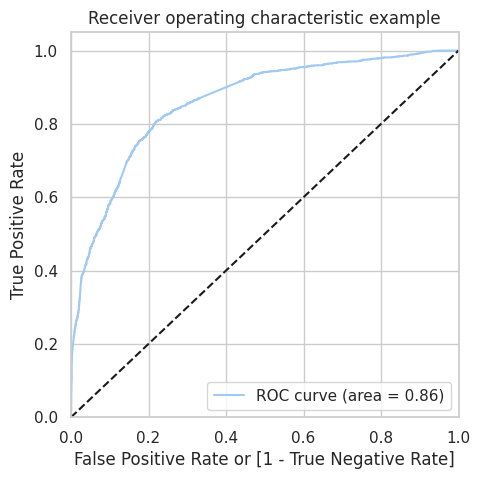

In [109]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [110]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.300117,0,1,1,1,1,0,0,0,0,0,0
1,0,0.142002,0,1,1,0,0,0,0,0,0,0,0
2,1,0.127629,0,1,1,0,0,0,0,0,0,0,0
3,1,0.291558,0,1,1,1,0,0,0,0,0,0,0
4,1,0.954795,1,1,1,1,1,1,1,1,1,1,1


In [111]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.527012  0.994416  0.092561
0.2   0.2  0.698274  0.944160  0.469723
0.3   0.3  0.767541  0.865984  0.676038
0.4   0.4  0.791975  0.810610  0.774654
0.5   0.5  0.788612  0.739414  0.834343
0.6   0.6  0.757229  0.624011  0.881055
0.7   0.7  0.735037  0.543509  0.913062
0.8   0.8  0.711500  0.453234  0.951557
0.9   0.9  0.644026  0.279665  0.982699


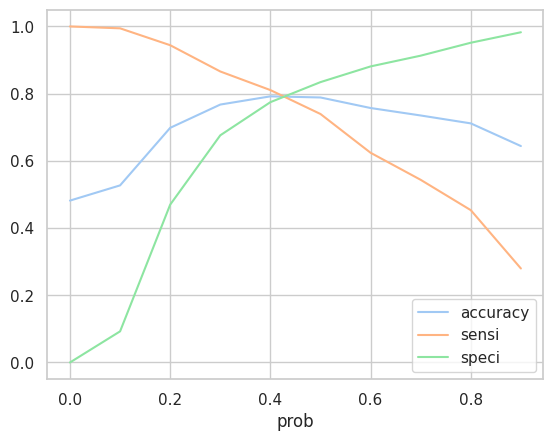

In [112]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [113]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.300117,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.142002,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.127629,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.291558,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.954795,1,1,1,1,1,1,1,1,1,1,1,1


In [114]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7908540685944856

In [115]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1823,  489],
       [ 444, 1705]])

In [116]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [117]:
# Calculating the 'Sensitivity'

TP/(TP+FN)

0.793392275476966

In [118]:
# Calculating the 'Specificity'

TN/(TN+FP)

0.7884948096885813

**Predictions on Test Set**

In [119]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] =  scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [120]:
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,0.000000,0.000000,1,0,1,0,0,0,1,0,0,0,1,0,0
6122,0.027888,0.029049,0,0,0,0,0,0,0,0,0,1,0,0,0
9202,0.015936,0.416813,0,0,0,0,0,0,1,0,0,1,0,0,0
6570,0.011952,0.378961,0,0,0,0,1,0,1,0,0,1,0,0,0
2668,0.031873,0.395246,0,0,0,0,0,0,1,0,0,1,0,0,0


In [121]:
X_test_sm = sm.add_constant(X_test[col])

In [122]:
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,1.0,0.000000,0.000000,1,0,1,0,0,0,1,0,0,0,1,0,0
6122,1.0,0.027888,0.029049,0,0,0,0,0,0,0,0,0,1,0,0,0
9202,1.0,0.015936,0.416813,0,0,0,0,0,0,1,0,0,1,0,0,0
6570,1.0,0.011952,0.378961,0,0,0,0,1,0,1,0,0,1,0,0,0
2668,1.0,0.031873,0.395246,0,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5828,1.0,0.011952,0.027289,0,0,0,0,0,0,1,0,0,1,0,0,0
6583,1.0,0.011952,0.152289,0,0,0,0,0,0,1,0,0,1,0,0,0
5531,1.0,0.055777,0.702025,0,0,0,0,0,0,0,0,0,1,0,0,0
3056,1.0,0.011952,0.417694,0,0,0,0,1,0,1,0,0,1,0,0,0


In [123]:
X_test.drop(['Lead Source_Reference', 'What is your current occupation_Housewife',
             'What is your current occupation_Working Professional',
                     'Last Notable Activity_Had a Phone Conversation'], 1,
                                inplace = True)

In [124]:
y_test_pred = res.predict(sm.add_constant(X_test))

In [125]:
y_test_pred[:10]

4771    0.996296
6122    0.129992
9202    0.703937
6570    0.299564
2668    0.720796
4233    0.792250
3368    0.704038
9091    0.464521
5972    0.282978
3631    0.786460
dtype: float64

In [126]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [127]:
y_pred_1.head()

,0
4771,0.996296
6122,0.129992
9202,0.703937
6570,0.299564
2668,0.720796


In [128]:
y_test_df = pd.DataFrame(y_test)

In [129]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [130]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [131]:
y_pred_final.head()

,Converted,0
0,1,0.996296
1,0,0.129992
2,0,0.703937
3,1,0.299564
4,1,0.720796


In [132]:
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [133]:
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.996296
1,0,0.129992
2,0,0.703937
3,1,0.299564
4,1,0.720796


In [134]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [135]:
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.996296,1
1,0,0.129992,0
2,0,0.703937,1
3,1,0.299564,0
4,1,0.720796,1


In [136]:
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7845188284518828

In [137]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[786, 210],
       [202, 714]])

In [138]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [139]:
# Calculating the 'sensitivity'
TP / float(TP+FN)

0.7794759825327511

In [140]:
# Calculating the 'specificity'
TN / float(TN+FP)

0.7891566265060241

**Recall**

In [141]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1929,  383],
       [ 560, 1589]])

In [142]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8057809330628803

In [143]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.739413680781759

In [144]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4456    1
 4457    0
 4458    0
 4459    0
 4460    0
 Name: Converted, Length: 4461, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 4456    1
 4457    1
 4458    1
 4459    0
 4460    0
 Name: Predicted, Length: 4461, dtype: int64)

In [145]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

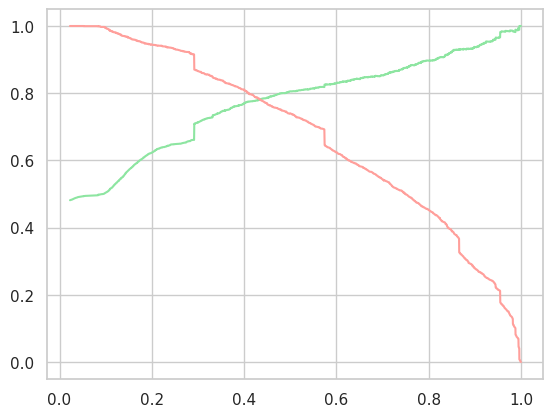

In [146]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [147]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.300117,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.142002,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.127629,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.291558,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.954795,1,1,1,1,1,1,1,1,1,1,1,1


In [148]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7895090786819099

In [149]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1852,  460],
       [ 479, 1670]])

In [150]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [151]:
# Precision
TP/(TP+FP)

0.784037558685446

In [152]:
# Recall
TP/(TP+FN)

0.7771056305258259

**Predictions on the Test Set**

In [153]:
y_test_pred = res.predict(sm.add_constant(X_test))

In [154]:
y_test_pred[:10]

4771    0.996296
6122    0.129992
9202    0.703937
6570    0.299564
2668    0.720796
4233    0.792250
3368    0.704038
9091    0.464521
5972    0.282978
3631    0.786460
dtype: float64

In [155]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [156]:
y_pred_1.head()

,0
4771,0.996296
6122,0.129992
9202,0.703937
6570,0.299564
2668,0.720796


In [157]:
y_test_df = pd.DataFrame(y_test)

In [158]:

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [159]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [160]:
y_pred_final.head()

,Converted,0
0,1,0.996296
1,0,0.129992
2,0,0.703937
3,1,0.299564
4,1,0.720796


In [161]:
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [162]:
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.996296
1,0,0.129992
2,0,0.703937
3,1,0.299564
4,1,0.720796


In [163]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

In [164]:
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.996296,1
1,0,0.129992,0
2,0,0.703937,1
3,1,0.299564,0
4,1,0.720796,1


In [165]:
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7866108786610879

In [166]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[801, 195],
       [213, 703]])

In [167]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [168]:
# Precision
TP/(TP+FP)

0.7828507795100222

In [169]:
# Recall
TP/(TP+FN)

0.767467248908297